# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to predict the price of the house at sales.

## Executive Summary

### Contents:
- [6. Pre-Processing](#6.-Pre-Processing)


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

## 6. Pre Processing

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.style.use('ggplot')

In [2]:
# Importing cleaned dataset for Pre Processing
df_train_pp = pd.read_csv("./datasets/train_EDA_sorted.csv", na_filter=False)

In [3]:
df_train_pp.head()

,MS Zoning,Street,Alley,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Year Built,Year Remod/Add,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Sale Type,SalePrice
0,RL,Pave,NA,Sawyer,RRAe,1Fam,2Story,6,1976,2005,...,RFn,2.0,475.0,TA,TA,Y,0,44,WD,130500
1,RL,Pave,NA,SawyerW,Norm,1Fam,2Story,7,1996,1997,...,RFn,2.0,559.0,TA,TA,Y,0,74,WD,220000
2,RL,Pave,NA,NAmes,Norm,1Fam,1Story,5,1953,2007,...,Unf,1.0,246.0,TA,TA,Y,0,52,WD,109000
3,RL,Pave,NA,Timber,Norm,1Fam,2Story,5,2006,2007,...,Fin,2.0,400.0,TA,TA,Y,100,0,WD,174000
4,RL,Pave,NA,SawyerW,Norm,1Fam,1.5Fin,6,1900,1993,...,Unf,2.0,484.0,TA,TA,N,0,59,WD,138500


In [4]:
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS Zoning       2051 non-null   object 
 1   Street          2051 non-null   object 
 2   Alley           2051 non-null   object 
 3   Neighborhood    2051 non-null   object 
 4   Condition 1     2051 non-null   object 
 5   Bldg Type       2051 non-null   object 
 6   House Style     2051 non-null   object 
 7   Overall Qual    2051 non-null   int64  
 8   Year Built      2051 non-null   int64  
 9   Year Remod/Add  2051 non-null   int64  
 10  Roof Style      2051 non-null   object 
 11  Exterior 1st    2051 non-null   object 
 12  Exterior 2nd    2051 non-null   object 
 13  Mas Vnr Area    2051 non-null   float64
 14  Exter Qual      2051 non-null   object 
 15  Exter Cond      2051 non-null   object 
 16  Foundation      2051 non-null   object 
 17  Bsmt Qual       2051 non-null   o

## 6.1 One-hot encode categorical variables

- Creating dummies for dataframe

In [5]:
#selecting object dtypes to create dummies
obj_data = df_train_pp.select_dtypes(['object']).keys()
print(obj_data)
len(obj_data)

Index(['MS Zoning', 'Street', 'Alley', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')


30

In [6]:
df_processed = pd.get_dummies(df_train_pp, columns = obj_data)
df_processed

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,...,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,6,1976,2005,289.0,533.0,192.0,725.0,725,754,1479,...,1,0,0,0,0,0,0,0,0,1
1,7,1996,1997,132.0,637.0,276.0,913.0,913,1209,2122,...,1,0,0,0,0,0,0,0,0,1
2,5,1953,2007,0.0,731.0,326.0,1057.0,1057,0,1057,...,1,0,0,0,0,0,0,0,0,1
3,5,2006,2007,0.0,0.0,384.0,384.0,744,700,1444,...,1,0,0,0,0,0,0,0,0,1
4,6,1900,1993,0.0,0.0,676.0,676.0,831,614,1445,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,8,2007,2007,0.0,1011.0,873.0,1884.0,1728,0,1728,...,1,0,0,0,0,0,0,0,0,1
2047,4,1940,1950,0.0,262.0,599.0,861.0,861,0,861,...,1,0,0,0,0,0,0,0,0,1
2048,6,1928,1950,0.0,0.0,896.0,896.0,1172,741,1913,...,1,0,0,0,0,0,0,0,0,1
2049,4,1956,1956,0.0,155.0,295.0,1200.0,1200,0,1200,...,1,0,0,0,0,0,0,0,0,1


In [7]:
#remove columns with NA count values
na_col = df_processed.filter(regex = 'NA')
na_col_keys = na_col.keys()
na_col_keys

Index(['Alley_NA', 'Neighborhood_NAmes', 'Bsmt Qual_NA', 'Bsmt Cond_NA',
       'Bsmt Exposure_NA', 'BsmtFin Type 1_NA', 'Fireplace Qu_NA',
       'Garage Type_NA', 'Garage Finish_NA', 'Garage Qual_NA',
       'Garage Cond_NA'],
      dtype='object')

In [8]:
df_processed.drop(columns = na_col_keys, inplace = True)
df_processed.shape 

(2051, 215)

# 5.2 Train/test split data.

In [9]:
col_keys = df_processed.drop(columns = 'SalePrice').keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area',
       ...
       'Paved Drive_Y', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=214)

In [10]:
y = df_processed['SalePrice']
X = df_processed[col_keys]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1640, 214) (1640,)
(411, 214) (411,)


In [23]:
train_model = LinearRegression()

train_model.fit(X_train, y_train)

LinearRegression()

In [24]:
train_predict = train_model.predict(X_test)
train_predict[0:5]

array([139674.9694272 , 217944.49711627, 335854.62533622, 113478.36288956,
       197543.54988468])

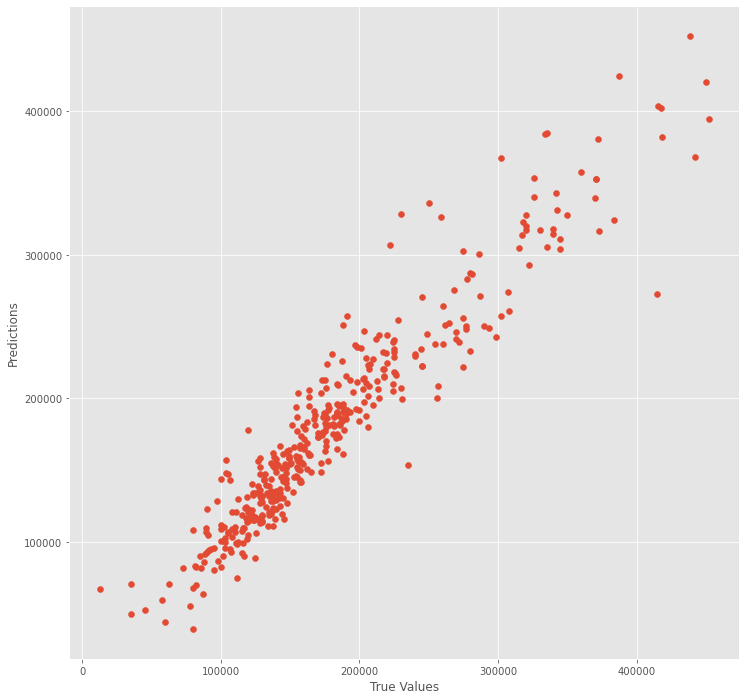

In [25]:
## The line / model
plt.figure(figsize=(12,12))
plt.scatter(y_test, train_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions');

In [27]:
print(train_model.score(X_test, y_test))
print(train_model.score(X_train, y_train))

0.9039845930013977
0.8982771667424612


# 5.3 Scale data

# 5.4 Automated feature selection